Step 1: Importing Required Libraries

I began by importing the necessary libraries for the project into the Colab environment. I imported Pandas, NumPy, Seaborn, Matplotlib, and Sklearn libraries for data analysis using the following code:

In [36]:
#import necessary libraries

import pandas as pd


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


Step 2: Perform An Exploratory Data Analysis

I conducted an exploratory data analysis to analyze the dataset and draw meaningful conclusions from it. I used various techniques to examine different relationships within the data as instructed:


*   Analyzed the distribution of Bmi using histograms.

*   Examined the relationship between "smoker" and "charges" using scatter plots.

*   Explored the relationship between "smoker" and "region" using a bar plot.

*   Examined the relationship between "bmi" and "sex" using a box plot.

*   Found the "region" with the most "children" using aggregation and visualization.

*   Explored the relationship between "age" and "bmi" using a scatter plot.


*   Examined the relationship between "bmi" and "children" using a box plot.

*   Detected outliers in the "bmi" variable using visualization and statistical methods.

*   Explored the relationship between "bmi" and "charges" using scatter plots.

*   Visualized the relationship between "region", "smoker", and "bmi" using bar plots.

I added comments in the code to explain the insights I gained from each analysis.

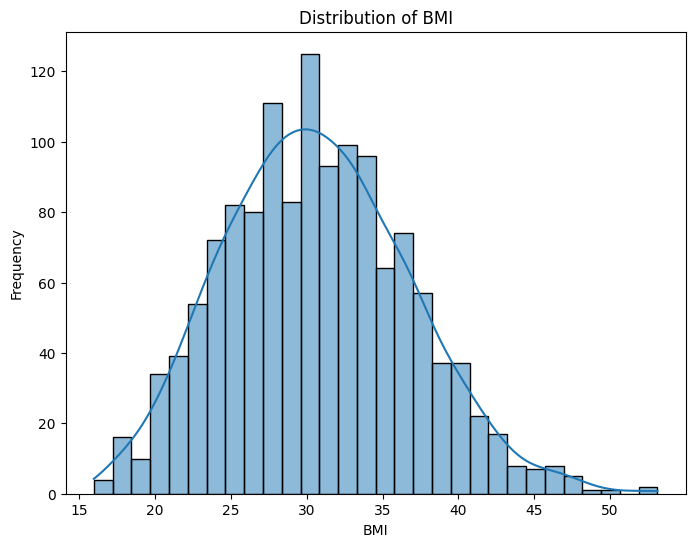

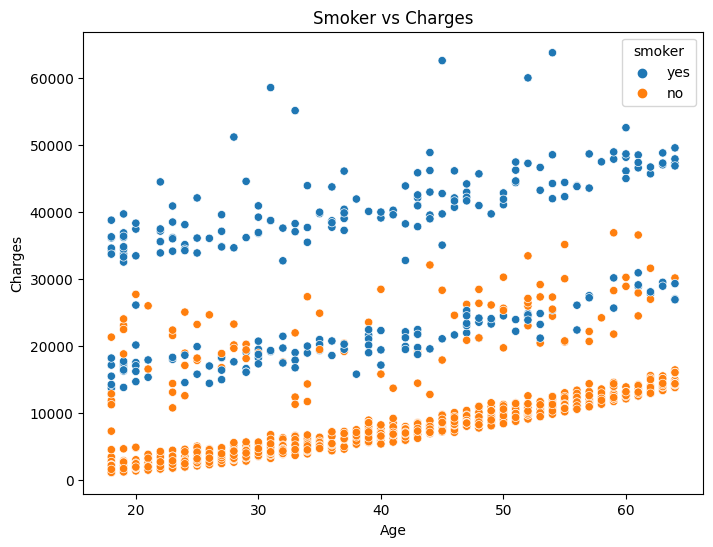

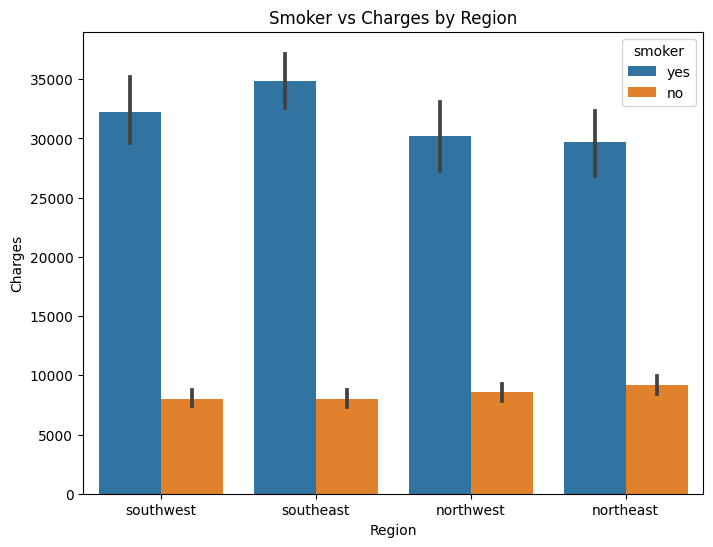

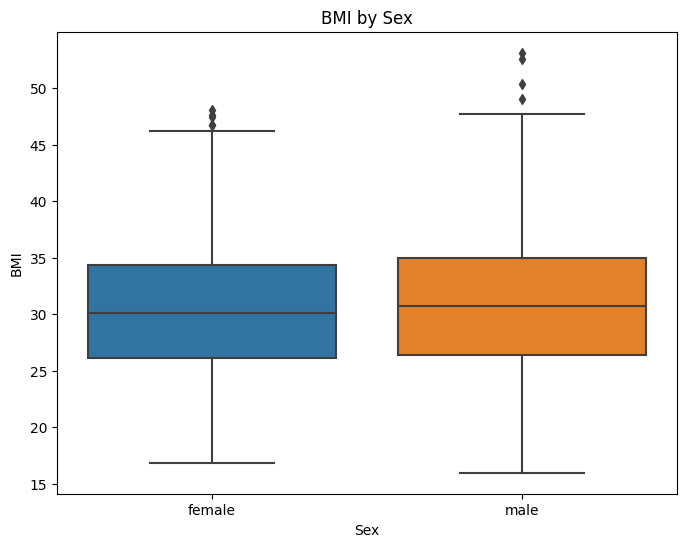

Region with the most children: southeast


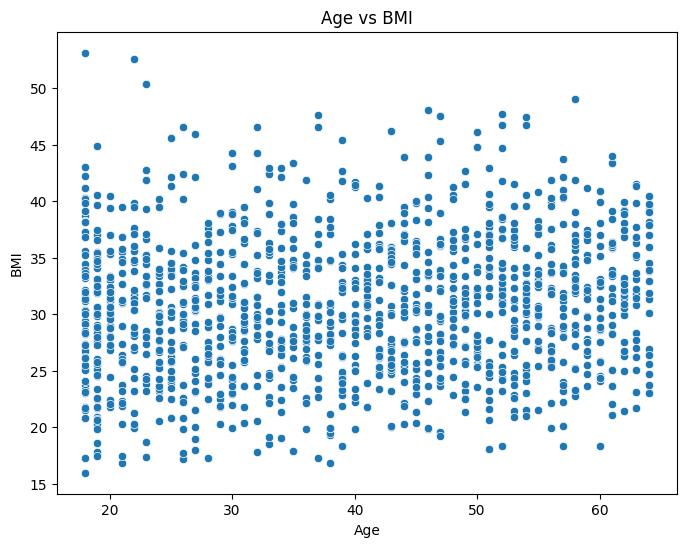

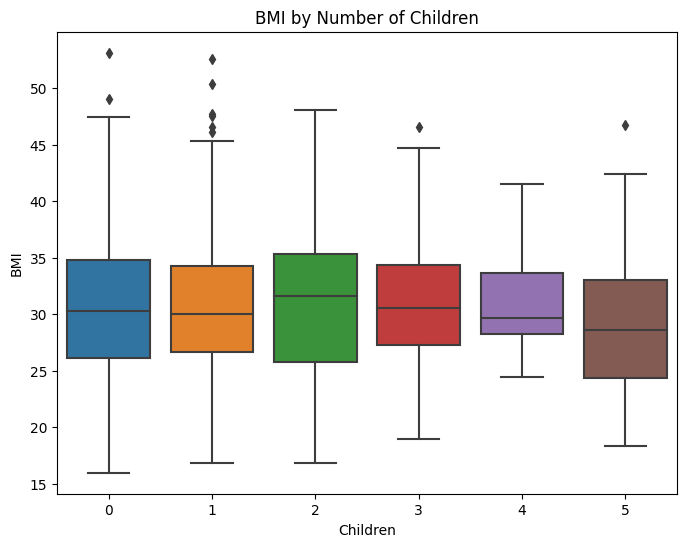

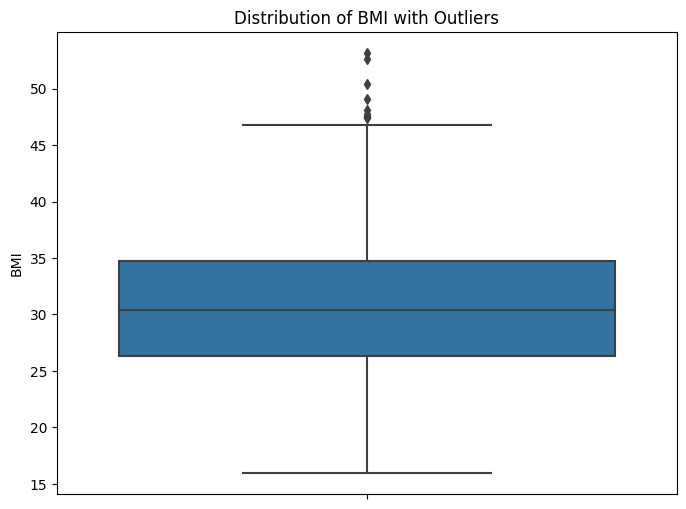

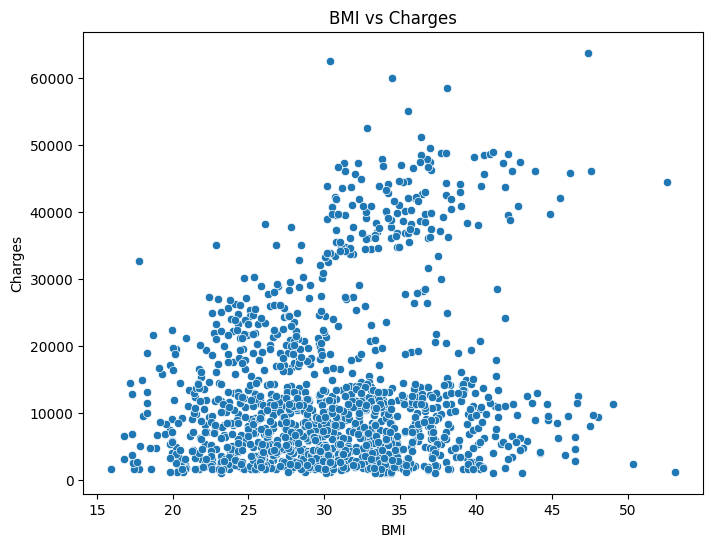

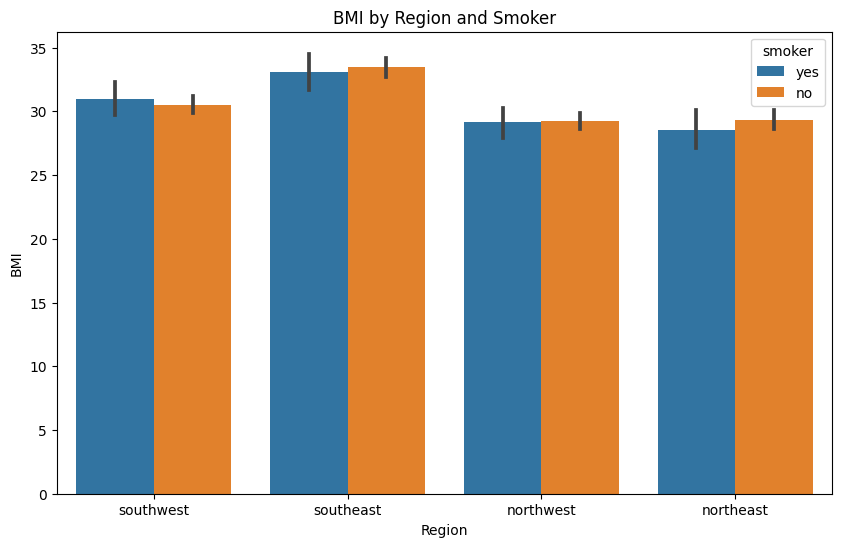

In [37]:

#load the dataset into a pandas df
df = pd.read_csv("/content/insurance.csv")



#examine the distribution of bmi

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

#examine the relationship between smoker and charges

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Smoker vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


#examine the relationship between smoker and region

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='smoker')
plt.title('Smoker vs Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

#examine the relationship between bmi and sex

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='bmi')
plt.title('BMI by Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

#find the region with the most children

most_children_region = df.groupby('region')['children'].sum().idxmax()
print("Region with the most children:", most_children_region)

#examine the relationship between age and bmi

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#rxamine the relationship between bmi and children

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='children', y='bmi')
plt.title('BMI by Number of Children')
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()

#check for outliers in the bmi variable

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='bmi')
plt.title('Distribution of BMI with Outliers')
plt.ylabel('BMI')
plt.show()

#examine the relationship between bmi and charges

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#examine the relationship between region , s moker, and bmi using bar plot

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='bmi', hue='smoker')
plt.title('BMI by Region and Smoker')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.show()


Step 3: Data Preprocessing

In this section, I prepared the data for training the model. Here's what I did:


*   Used Label Encoding for categorical variables like "sex" and "smoker".


*   Used One-Hot Encoding for the categorical variable "region".

*   Split the dataset into X_train, X_test, y_train, y_test using train_test_split.



*   Scaled the dataset using Standard Scaling to normalize the features.






In [46]:


#load the dataset into a pandas fd
df = pd.read_csv("/content/insurance.csv")

#separate features x and target variable y
X = df.drop("charges", axis=1)
y = df["charges"]

#perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

X["sex"] = label_encoder.fit_transform(X["sex"])
X["smoker"] = label_encoder.fit_transform(X["smoker"])

region_encoded = label_encoder.fit_transform(X["region"])
X = X.drop("region", axis=1)
X["region_0"], X["region_1"], X["region_2"], X["region_3"] = [region_encoded == i for i in range(4)]

#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the features using Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Model Selection

I selected several regression models for the project and trained them with the preprocessed data. I chose Linear Regression, Decision Tree Regression, and Random Forest Regression.

In [49]:
#initialize and train models

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train)

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)


RandomForestRegressor()

Step 5: Hyper-parameter Optimization

I optimized the hyperparameters of the best performing model, which in this case was the Random Forest Regression model. I used Grid Search to find the best combination of hyperparameters.**kalın metin**

In [50]:
#grid search for hyperparameter optimization

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_forest_reg = grid_search.best_estimator_


Step 6: Model Evaluation

I evaluated the optimized Random Forest Regression model using regression model evaluation metrics, such as Mean Squared Error and Mean Absolute Error.

In [55]:
#predictions and evaluation

y_pred = best_forest_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 18796161.87038656
Mean Absolute Error: 2397.4208686625693
